In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [207]:
houseprice = pd.read_csv('data/Ames_HousePrice_cleaned.csv')
houseprice

x_train = pd.read_csv('data/x_train_dummies.csv')
x_test = pd.read_csv('data/x_test_dummies.csv')
y_train = pd.read_csv('data/y_train_dummies.csv')
y_test = pd.read_csv('data/y_test_dummies.csv')

# exclude PIDs from analysis 
x_train.iloc[:,1:].head()

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,Fireplaces,GarageArea,OurdoorSpace,MoSold,YrSold,YrMoSold,AgeSold,Longitude,Latitude,distFromCenter,mssc_30,mssc_40,mssc_45,mssc_50,mssc_60,mssc_70,mssc_75,mssc_80,mssc_85,mssc_90,mssc_120,mssc_150,mssc_160,mssc_180,mssc_190,msz_C (all),msz_FV,msz_I (all),msz_RH,msz_RL,msz_RM,ls_IR2,ls_IR3,ls_Reg,lc_HLS,lc_Low,lc_Lvl,lcf_CulDSac,lcf_FR2,lcf_FR3,lcf_Inside,nghbr_Blueste,nghbr_BrDale,nghbr_BrkSide,nghbr_ClearCr,nghbr_CollgCr,nghbr_Crawfor,nghbr_Edwards,nghbr_Gilbert,nghbr_Greens,nghbr_GrnHill,nghbr_IDOTRR,nghbr_Landmrk,nghbr_MeadowV,nghbr_Mitchel,nghbr_NAmes,nghbr_NPkVill,nghbr_NWAmes,nghbr_NoRidge,nghbr_NridgHt,nghbr_OldTown,nghbr_SWISU,nghbr_Sawyer,nghbr_SawyerW,nghbr_Somerst,nghbr_StoneBr,nghbr_Timber,nghbr_Veenker,bt_2fmCon,bt_Duplex,bt_Twnhs,bt_TwnhsE,hs_1.5Unf,hs_1Story,hs_2.5Fin,hs_2.5Unf,hs_2Story,hs_SFoyer,hs_SLvl,mvt_BrkFace,mvt_None,mvt_Stone,eq_Fa,eq_Gd,eq_TA,ec_Fa,ec_Gd,ec_Po,ec_TA,f_CBlock,f_PConc,f_Slab,f_Stone,f_Wood,bq_Fa,bq_Gd,bq_Po,bq_TA,bc_Fa,bc_Gd,bc_Po,bc_TA,be_Gd,be_Mn,be_No,bf1_BLQ,bf1_GLQ,bf1_LwQ,bf1_Rec,bf1_Unf,bf2_BLQ,bf2_GLQ,bf2_LwQ,bf2_Rec,bf2_Unf,hq_Fa,hq_Gd,hq_Po,hq_TA,ca_Y,kq_Fa,kq_Gd,kq_Po,kq_TA,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0,1080,7500,7,5,2004,2005,120.0,680.0,0.0,1080.0,1080,0,1,3,0,0.0,0,4,2008,2008.333333,3.333333,-93.679583,42.018564,3.068516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1382,8923,7,5,1998,1998,0.0,189.0,0.0,384.0,751,631,2,3,1,396.0,256,2,2009,2009.166667,11.166667,-93.646726,41.995512,2.328505,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
2,1446,21872,7,5,1996,1997,0.0,604.0,0.0,729.0,729,717,2,3,1,406.0,286,8,2008,2008.666667,11.666667,-93.627638,42.041394,1.334535,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1448,7500,8,5,2006,2007,238.0,24.0,0.0,1372.0,1448,0,2,2,1,692.0,140,6,2009,2009.500000,2.500000,-93.625760,42.029451,0.536280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,1733,12394,7,5,2003,2003,0.0,0.0,0.0,847.0,847,886,2,3,1,433.0,148,10,2007,2007.833333,4.833333,-93.627242,42.051833,2.031786,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1


### `Lasso Regression`

In [239]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

ss = StandardScaler()
xtrain_scalar = ss.fit_transform(x_train)


lassocv = LassoCV(alphas = np.logspace(-2,4,20), cv=10, max_iter =100000, normalize=True, random_state=0)
trainscore = [] 
testscore = [] 

lassocv.fit(x_train, y_train['SalePrice'])

alpha_best = lassocv.alpha_
coefs = lasso.coef_

lasso_best = Lasso(alpha=alpha_best)

trainscore.append(lassocv.score(x_train, y_train))
testscore.append(lassocv.score(x_test, y_test))

print('Best alpha: {}'.format(alpha_best))
print('Train Score: {}'.format(trainscore))
print('Test Score: {}'.format(testscore))


# howcome it looks like the cross validated Lasso resulted in even lower R^2 score?

# coefs_lasso = [] 
# result = {} 
#alpha = np.logspace(-2,4,20)
#lasso=Lasso()
#lasso.set_params(normalize=True)

# for alpha in alphas:
#    lasso.set_params(alpha = alpha)
#    lasso.fit(x_train.iloc[:,1:], y_train)
#    coefs_lasso.append(lasso.coef_)
#    result[alpha] = lasso.score(x_test.iloc[:, 1:], y_test)

Best alpha: 3.359818286283781
Train Score: [0.9186273704022174]
Test Score: [0.9198038057885364]


array([[-0.97204263, -0.8270849 , -0.3120132 , ..., -0.1302257 ,
        -0.04720606,  0.30921692],
       [-0.99431457, -0.1995969 , -0.14965217, ..., -0.1302257 ,
        -0.04720606,  0.30921692],
       [-0.99459989, -0.06661931,  1.32779898, ..., -0.1302257 ,
        -0.04720606,  0.30921692],
       ...,
       [-0.96678951, -1.27588427, -0.1980296 , ..., -0.1302257 ,
        -0.04720606,  0.30921692],
       [-0.95115438, -0.97668469,  0.29019447, ..., -0.1302257 ,
        -0.04720606, -3.23397568],
       [ 1.01960642, -1.17199553, -0.15843769, ..., -0.1302257 ,
        -0.04720606,  0.30921692]])

In [119]:
lasso.coef_

array([ 0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,
       -0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0.,
       -0.,  0., -0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,
        0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,  0., -0., -0.,
       -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,  0.])

In [120]:
coefs_lasso = pd.DataFrame(coefs_lasso, index=alphas, columns = x_train.columns[1:])
coefs_lasso.head()

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,Fireplaces,GarageArea,OurdoorSpace,MoSold,YrSold,YrMoSold,AgeSold,Longitude,Latitude,distFromCenter,mssc_30,mssc_40,mssc_45,mssc_50,mssc_60,mssc_70,mssc_75,mssc_80,mssc_85,mssc_90,mssc_120,mssc_150,mssc_160,mssc_180,mssc_190,msz_C (all),msz_FV,msz_I (all),msz_RH,msz_RL,msz_RM,ls_IR2,ls_IR3,ls_Reg,lc_HLS,lc_Low,lc_Lvl,lcf_CulDSac,lcf_FR2,lcf_FR3,lcf_Inside,nghbr_Blueste,nghbr_BrDale,nghbr_BrkSide,nghbr_ClearCr,nghbr_CollgCr,nghbr_Crawfor,nghbr_Edwards,nghbr_Gilbert,nghbr_Greens,nghbr_GrnHill,nghbr_IDOTRR,nghbr_Landmrk,nghbr_MeadowV,nghbr_Mitchel,nghbr_NAmes,nghbr_NPkVill,nghbr_NWAmes,nghbr_NoRidge,nghbr_NridgHt,nghbr_OldTown,nghbr_SWISU,nghbr_Sawyer,nghbr_SawyerW,nghbr_Somerst,nghbr_StoneBr,nghbr_Timber,nghbr_Veenker,bt_2fmCon,bt_Duplex,bt_Twnhs,bt_TwnhsE,hs_1.5Unf,hs_1Story,hs_2.5Fin,hs_2.5Unf,hs_2Story,hs_SFoyer,hs_SLvl,mvt_BrkFace,mvt_None,mvt_Stone,eq_Fa,eq_Gd,eq_TA,ec_Fa,ec_Gd,ec_Po,ec_TA,f_CBlock,f_PConc,f_Slab,f_Stone,f_Wood,bq_Fa,bq_Gd,bq_Po,bq_TA,bc_Fa,bc_Gd,bc_Po,bc_TA,be_Gd,be_Mn,be_No,bf1_BLQ,bf1_GLQ,bf1_LwQ,bf1_Rec,bf1_Unf,bf2_BLQ,bf2_GLQ,bf2_LwQ,bf2_Rec,bf2_Unf,hq_Fa,hq_Gd,hq_Po,hq_TA,ca_Y,kq_Fa,kq_Gd,kq_Po,kq_TA,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0.010000,50.260674,0.404336,8456.632068,6388.797700,360.669149,13.135135,30.182049,22.069638,19.042237,13.767025,-0.456822,9.916658,-1169.039917,-3619.292660,5753.780723,24.580734,7.701438,-313.843946,-0.0,-344.185908,-1.543845,10739.424632,6683.048040,-184.171454,2803.688495,1295.595328,11016.320553,6826.364597,1831.812986,4556.844054,23115.247190,-10098.161897,-7956.401534,-16607.481445,-27100.949455,-22030.156980,-25766.621332,-24605.570051,-19268.160071,-17757.688376,-6060.651866,-2899.726726,-5173.514682,-4521.766932,-11197.773973,6338.355692,5088.197957,2897.069367,19907.631026,8799.899703,12978.814981,10748.270880,-2434.755392,-6230.641592,1023.640365,2671.065913,3956.382224,-8419.425474,-16965.435527,-12735.048958,7660.554507,-20680.804937,-9665.831910,-6108.204252,117713.312408,-13179.654957,8024.583856,-1423.739498,-16262.367695,-17781.966547,9763.348867,-17294.551367,26361.361900,20475.939629,-17738.728286,-22080.661824,-16629.986931,-17268.591595,7232.275884,33169.634442,-10649.073890,50.752782,9593.937669,-0.456057,-6692.291472,2188.184056,2323.875717,11671.432146,10372.385042,-10485.340380,108.497588,15416.549595,18078.200070,1477.648227,7526.161741,3964.183884,-17516.031775,-23093.902165,-27077.487157,-1528.897098,9869.540269,1172.289261,7922.679368,315.589157,4184.289433,444.438768,18413.297947,-6497.548405,-13159.344434,-16305.737186,0.0,-13369.990228,7793.718250,8720.361429,22943.460502,6168.715732,7771.744385,-6509.380462,-5668.716951,-628.494844,3202.684449,-3996.683273,-921.322916,3937.303975,-1339.435555,13470.491374,152.382794,710.222799,5361.291822,-2290.530030,-1781.016282,-22343.023323,-3363.540607,-502.128888,-22046.452636,-20556.768899,1624.130208,-23512.289423,-5150.577499,-10551.240895,-9243.459617,-3879.142848,-4055.251128,-4338.917696,1783.187524,-12362.362438,2841.249428,-13736.215838,4861.854378,15571.933011,5921.719015,-2229.444347,-775.150151
0.013257,50.192278,0.404367,8456.048782,6388.025885,360.659397,12.648891,30.179868,22.068151,19.038557,13.767316,-0.382900,9.977380,-1169.305256,-3619.121785,5753.101528,24.577698,7.700214,-313.864233,-0.0,-343.927366,-2.048689,10732.489166,6669.823556,-184.326668,2799.662429,1292.516002,11003.012573,6799.540631,1823.753260,4543.926551,23090.287884,-10082.708981,-7952.867810,-16612.314757,-27052.669021,-22000.483560,-25729.058531,-24551.279960,-19234.981366,-17420.566529,-5716.021548,-2585.402126,-4832.120245,-4181.229614,-10858.668954,6336.170038,5080.268607,2897.122889,19902.756168,8791.715467,12972.884892,10747.386427,-2434.272446,-6232.2017

In [67]:
pd.set_option('display.max_rows', None)
result

# best alpha  54.286754393238596

{0.01: 0.9191377534846984,
 0.013257113655901088: 0.9191386156806083,
 0.017575106248547922: 0.9191397581403251,
 0.023299518105153717: 0.9191412717274032,
 0.030888435964774818: 0.9191432767316647,
 0.040949150623804255: 0.9191459316971029,
 0.054286754393238594: 0.9191494460261012,
 0.07196856730011521: 0.9191545700483312,
 0.09540954763499938: 0.9191614073432904,
 0.12648552168552957: 0.9191705921846339,
 0.16768329368110083: 0.9191823734077995,
 0.22229964825261944: 0.919197530087151,
 0.29470517025518095: 0.9192173080342312,
 0.3906939937054617: 0.9192436913885401,
 0.517947467923121: 0.9192787492653894,
 0.6866488450043002: 0.9193211463199452,
 0.9102981779915218: 0.9193654235189794,
 1.2067926406393288: 0.919422255697307,
 1.5998587196060574: 0.9194940899179188,
 2.1209508879201904: 0.919585562952963,
 2.8117686979742307: 0.9197031652003416,
 3.727593720314938: 0.9198607154536992,
 4.941713361323833: 0.9200310922884753,
 6.551285568595509: 0.9202210923439313,
 8.68511373751352: 

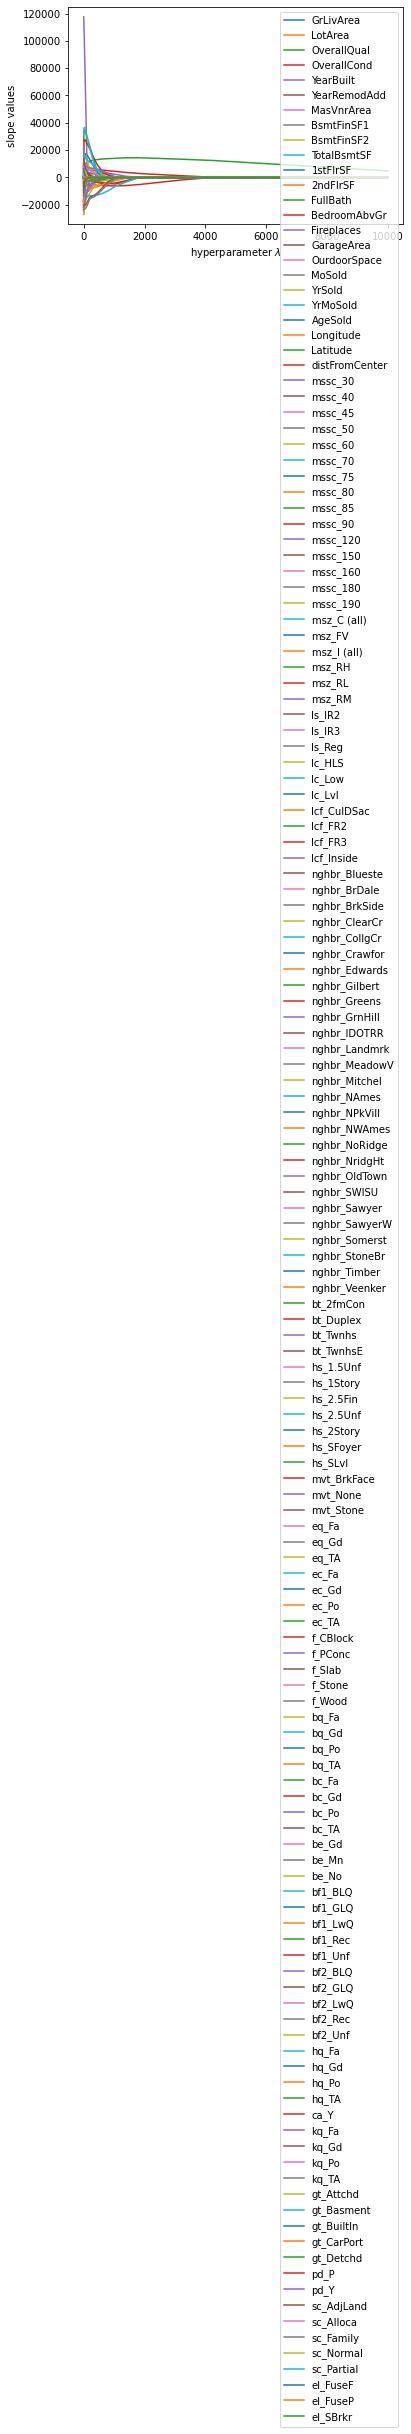

In [69]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)

### `Ridge Regression`

In [103]:
y_train.head()

,SalePrice
0,141000
1,177500
2,175000
3,238500
4,225000


In [149]:
alpha2 = np.arange(0,20)
ridge = Ridge()
ridge.set_params(normalize=False)
coefs_ridge = [] 
results = {}

for alpha in alpha2: 
    ridge.set_params(alpha=alpha)
    ridge.fit(x_train.iloc[:,1:], y_train['SalePrice'])
    coefs_ridge.append(ridge.coef_)
    results[alpha] = ridge.score(x_test.iloc[:,1:], y_test['SalePrice'])

coefs_ridge = pd.DataFrame(coefs_ridge, index = alpha2, columns = x_train.columns[1:])
# coefs_ridge.head()



In [157]:
ridge.coef_

array([ 4.95371031e+01,  4.51041770e-01,  1.08825434e+04,  6.30566738e+03,
        4.08748400e+02, -3.97109766e+01,  4.02192569e+01,  2.23167598e+01,
        1.74095358e+01,  1.74244138e+01,  2.07385428e+00,  1.01511449e+01,
       -2.55508316e+03, -4.47825759e+03,  5.02478311e+03,  2.74463458e+01,
        9.12220403e+00, -1.99082741e+02, -1.29408496e+02, -1.45991351e+02,
       -1.06287679e+02,  4.31115581e+02,  3.94376926e+02, -3.51251474e+02,
        3.17522524e+03, -3.30796130e+02,  1.50061138e+03,  1.63104263e+03,
        2.34555330e+03,  2.77213221e+03,  3.93430022e+03,  1.05984792e+02,
        2.97176636e+01, -6.52874144e+03, -9.02979958e+03, -1.41244577e+03,
       -7.57166498e+03, -1.60876799e+02, -4.61103727e+03, -3.23732271e+03,
        1.79937465e+03,  3.33773154e+01, -1.55816994e+02,  4.13016498e+03,
       -3.17352114e+03,  3.27196478e+03, -5.48006494e+02,  1.40114762e+03,
        1.26177085e+04,  1.00016646e+03,  5.83141460e+03,  8.41477771e+03,
       -2.20232661e+03, -

In [173]:
coefs_ridge = pd.DataFrame(coefs_lasso, index=alphas, columns = x_train.columns[1:])
coefs_ridge.head()

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,Fireplaces,GarageArea,OurdoorSpace,MoSold,YrSold,YrMoSold,AgeSold,Longitude,Latitude,distFromCenter,mssc_30,mssc_40,mssc_45,mssc_50,mssc_60,mssc_70,mssc_75,mssc_80,mssc_85,mssc_90,mssc_120,mssc_150,mssc_160,mssc_180,mssc_190,msz_C (all),msz_FV,msz_I (all),msz_RH,msz_RL,msz_RM,ls_IR2,ls_IR3,ls_Reg,lc_HLS,lc_Low,lc_Lvl,lcf_CulDSac,lcf_FR2,lcf_FR3,lcf_Inside,nghbr_Blueste,nghbr_BrDale,nghbr_BrkSide,nghbr_ClearCr,nghbr_CollgCr,nghbr_Crawfor,nghbr_Edwards,nghbr_Gilbert,nghbr_Greens,nghbr_GrnHill,nghbr_IDOTRR,nghbr_Landmrk,nghbr_MeadowV,nghbr_Mitchel,nghbr_NAmes,nghbr_NPkVill,nghbr_NWAmes,nghbr_NoRidge,nghbr_NridgHt,nghbr_OldTown,nghbr_SWISU,nghbr_Sawyer,nghbr_SawyerW,nghbr_Somerst,nghbr_StoneBr,nghbr_Timber,nghbr_Veenker,bt_2fmCon,bt_Duplex,bt_Twnhs,bt_TwnhsE,hs_1.5Unf,hs_1Story,hs_2.5Fin,hs_2.5Unf,hs_2Story,hs_SFoyer,hs_SLvl,mvt_BrkFace,mvt_None,mvt_Stone,eq_Fa,eq_Gd,eq_TA,ec_Fa,ec_Gd,ec_Po,ec_TA,f_CBlock,f_PConc,f_Slab,f_Stone,f_Wood,bq_Fa,bq_Gd,bq_Po,bq_TA,bc_Fa,bc_Gd,bc_Po,bc_TA,be_Gd,be_Mn,be_No,bf1_BLQ,bf1_GLQ,bf1_LwQ,bf1_Rec,bf1_Unf,bf2_BLQ,bf2_GLQ,bf2_LwQ,bf2_Rec,bf2_Unf,hq_Fa,hq_Gd,hq_Po,hq_TA,ca_Y,kq_Fa,kq_Gd,kq_Po,kq_TA,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd,pd_P,pd_Y,sc_AdjLand,sc_Alloca,sc_Family,sc_Normal,sc_Partial,el_FuseF,el_FuseP,el_SBrkr
0.010000,50.260674,0.404336,8456.632068,6388.797700,360.669149,13.135135,30.182049,22.069638,19.042237,13.767025,-0.456822,9.916658,-1169.039917,-3619.292660,5753.780723,24.580734,7.701438,-313.843946,-0.0,-344.185908,-1.543845,10739.424632,6683.048040,-184.171454,2803.688495,1295.595328,11016.320553,6826.364597,1831.812986,4556.844054,23115.247190,-10098.161897,-7956.401534,-16607.481445,-27100.949455,-22030.156980,-25766.621332,-24605.570051,-19268.160071,-17757.688376,-6060.651866,-2899.726726,-5173.514682,-4521.766932,-11197.773973,6338.355692,5088.197957,2897.069367,19907.631026,8799.899703,12978.814981,10748.270880,-2434.755392,-6230.641592,1023.640365,2671.065913,3956.382224,-8419.425474,-16965.435527,-12735.048958,7660.554507,-20680.804937,-9665.831910,-6108.204252,117713.312408,-13179.654957,8024.583856,-1423.739498,-16262.367695,-17781.966547,9763.348867,-17294.551367,26361.361900,20475.939629,-17738.728286,-22080.661824,-16629.986931,-17268.591595,7232.275884,33169.634442,-10649.073890,50.752782,9593.937669,-0.456057,-6692.291472,2188.184056,2323.875717,11671.432146,10372.385042,-10485.340380,108.497588,15416.549595,18078.200070,1477.648227,7526.161741,3964.183884,-17516.031775,-23093.902165,-27077.487157,-1528.897098,9869.540269,1172.289261,7922.679368,315.589157,4184.289433,444.438768,18413.297947,-6497.548405,-13159.344434,-16305.737186,0.0,-13369.990228,7793.718250,8720.361429,22943.460502,6168.715732,7771.744385,-6509.380462,-5668.716951,-628.494844,3202.684449,-3996.683273,-921.322916,3937.303975,-1339.435555,13470.491374,152.382794,710.222799,5361.291822,-2290.530030,-1781.016282,-22343.023323,-3363.540607,-502.128888,-22046.452636,-20556.768899,1624.130208,-23512.289423,-5150.577499,-10551.240895,-9243.459617,-3879.142848,-4055.251128,-4338.917696,1783.187524,-12362.362438,2841.249428,-13736.215838,4861.854378,15571.933011,5921.719015,-2229.444347,-775.150151
0.013257,50.192278,0.404367,8456.048782,6388.025885,360.659397,12.648891,30.179868,22.068151,19.038557,13.767316,-0.382900,9.977380,-1169.305256,-3619.121785,5753.101528,24.577698,7.700214,-313.864233,-0.0,-343.927366,-2.048689,10732.489166,6669.823556,-184.326668,2799.662429,1292.516002,11003.012573,6799.540631,1823.753260,4543.926551,23090.287884,-10082.708981,-7952.867810,-16612.314757,-27052.669021,-22000.483560,-25729.058531,-24551.279960,-19234.981366,-17420.566529,-5716.021548,-2585.402126,-4832.120245,-4181.229614,-10858.668954,6336.170038,5080.268607,2897.122889,19902.756168,8791.715467,12972.884892,10747.386427,-2434.272446,-6232.2017

In [158]:
results
# highest R^2 observed when alpha =  7.442922330043758: 0.9218078476103153

{0: -1.6008948703242652e+16,
 1: 0.920403286252232,
 2: 0.9209703532122384,
 3: 0.9213198819399955,
 4: 0.9215461095101084,
 5: 0.9216892037677681,
 6: 0.9217716399605698,
 7: 0.9218078476103153,
 8: 0.9218078516152127,
 9: 0.9217789733530076,
 10: 0.9217267457818838,
 11: 0.9216554559387063,
 12: 0.9215684895954953,
 13: 0.9214685616770216,
 14: 0.9213578764001638,
 15: 0.9212382420123754,
 16: 0.9211111550460976,
 17: 0.920977863457261,
 18: 0.9208394147568499,
 19: 0.9206966932449381}

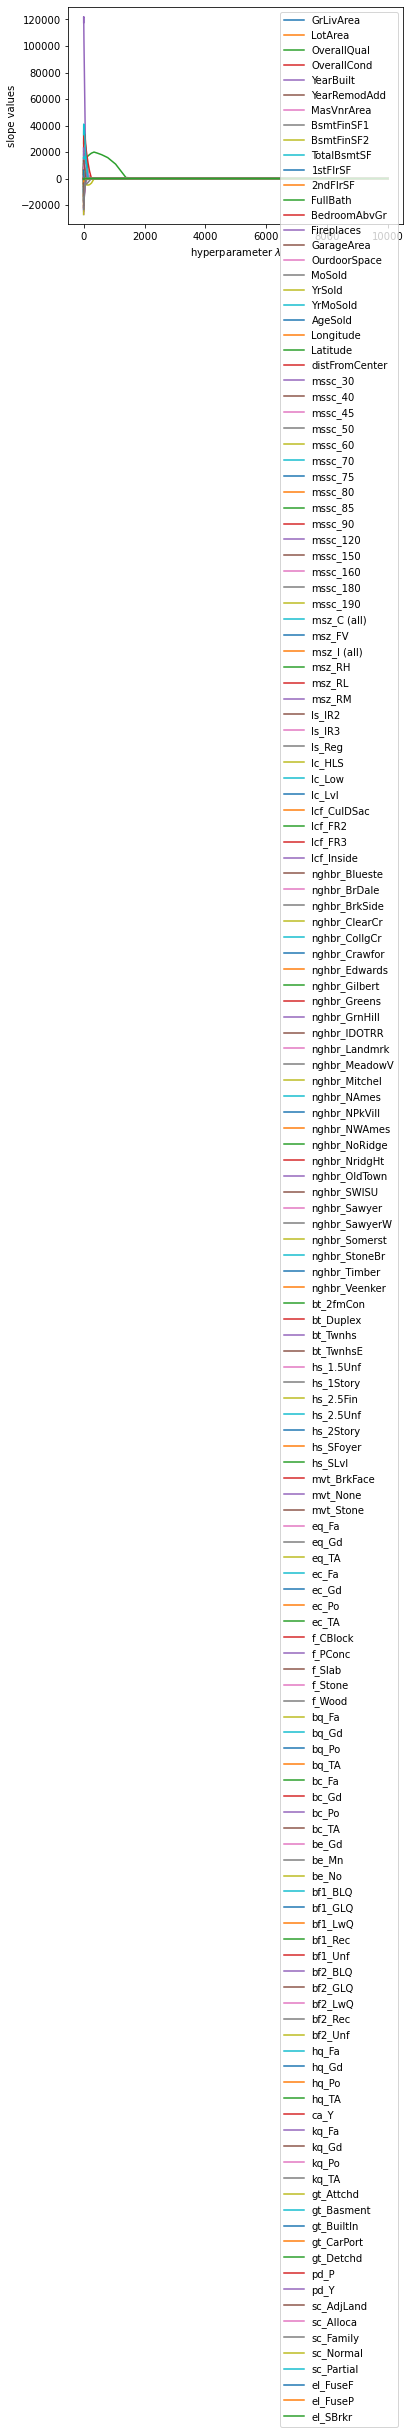

In [174]:
# plotting 
for name in coefs_ridge.columns:
    plt.plot(coefs_ridge.index, coefs_ridge[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)


# why is the graph so cluttered? I set the range of alphas from 0-20 

### `Logistic Regression`

The ROC_AUC (receiver operating characteristic curve) is a metric that helps to optimize between sensitivity/specificity, allowing us to maximize our number of true positive and minimize the true negatives sacrificed (which we get when we try different decision boundary/threshold levels in confusion matrices). 

In [188]:
# FOR BINARY/CLASSIFICATION PROBLEMS ONLY 

from sklearn.metrics import confusion_matrix, roc_auc_score


def get_confusion_matrix(bi_clf, x,y, thres= 0.5):
    return confusion_matrix(
        y,
        bi_clf.predict_proba(x)[:1] > thres
    )

get_confusion_matrix(logit, x_test, y_test)

In [187]:
print(roc_auc_score(y_test, logit.predict_proba(x_test)[:,1]))


Grid Search 

Used to select the best C value to use in our regression by searching from a parameter grid, and picking the one that produces the best test score. The candidate parameters form a grid, hence, why it is called a grid search. 

In [186]:
from sklearn.linear_model import LogisticRegression


for C in [0.0001, 0.01, 1, 100, 10000, 1000000, 100000000]:
    logit = LogisticRegression(C=C, solver="liblinear")
    logit.fit(x_train, y_train['SalePrice'])
    print('C:', C)
    print('Test Score:', logit.score(x_test, y_test), '\n')

# because our problem is not a binary/classification problem, the test scores are extremely low. 

C: 0.0001
Test Score: 0.007772020725388601 

C: 0.01
Test Score: 0.007772020725388601 

C: 1
Test Score: 0.007772020725388601 

C: 100
Test Score: 0.007772020725388601 

C: 10000
Test Score: 0.007772020725388601 

C: 1000000
Test Score: 0.007772020725388601 

C: 100000000
Test Score: 0.007772020725388601 



In [167]:
pred = logit.predict(x_train)
set(pred)

{130000, 375000}

### `Cross Validation (K Fold)`

Cross validation is a process whereby we use the entire dataset to train/test the model, instead of only using a portion for testing, and a portion for training. If we use a 70/30 train/test ratio, we miss out on training 30% of the data, and we miss out on testing 70% of the data, which is not ideal. 

The concept of cross validation splits the dataset up into k parts (specified by user) and do a k step training process/testing process. 
The final score is taken by averaging the ROC-AUC score of each iteration. 

I.e. 

3 fold cross validation (k=3), data is split into P1, P2, P3. 

Iteration 1: 
Train on P1, P2 
Test on P3 

Iteration 2: 
Train on P1, P3
Test on P2 

Iteration 3: 
Train on P2, P3
Test on P1 

Final score: mean(AUC_ROC1, AUC_ROC2, AUC_ROC3)

#### `How to Choose a K Value?`

This depends on your time and budget, but in general, it depends on the size of your dataset. 

With a smaller dataset, it may be wise to use a large number of K (i.e. 10). 

With a large dataset, you can use a smaller k to save time / computational load. 

For very large datasets, you may want to forgo k fold testing and stick with a test/train split because there is so much data, there is no concern over not maximizing the amount of data used to train/test. 




In [189]:
from sklearn.model_selection import cross_val_score

lm = LogisticRegression(C=1, solver='liblinear')
scores = cross_val_score(lm, x_train, y_train, cv=kfold)
print(scores)
print(
    'The cross validation score for the logistic regression with c={} is{}'.format(
        lm.get_params()['C'], np.mean(scores)))

In [ ]:
# stratification is considered when regressing a binary/classification problem, and when you want to ensure that your y variable is evenly 
# distributed among your split datasets  

from sklearn.model import StratifiedKFold 

skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
for training_idx, validation idx in skfold.split(x_train, y_train):
    print('the __rate of the training set of this fold is {}.'.format(y_train.iloc[training_idx].mean()))
    print('the __rate of the validation set of this fold is {}.'.format(y_train.iloc[training_idx].mean()))
    print('\n')

### `Grid Search with Cross Validation (K-Fold`

Combining the concepts above into one: 


In [192]:
skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

result = {}
for C in [0.0001, 0.01, 1, 100, 10000, 1000000, 100000000]:
    logistic = LogisticRegression(C=C, solver='liblinear')
    result[C] = cross_val_score(logistic, x_train, y_train, cv=skfold).mean()

result 